# Gradient Descent

Suppose you have a multi-variable real-valued function $f:\mathbb{R}^{n}\rightarrow \mathbb{R}$ for which you want to find the input $\mathbf{x}$ that produces the smallest possible output $f(\mathbf{x})$. For example, $f$ could be the error associated with a machine learning algorithm with model parameters $\mathbf{x}$.  One way to mimimize $f$ is to use a first-order iterative optimization algorithm called *gradient descent*.  Gradient descent is one of the most popular optimization strategies due to its simplicity, and is used throughout machine learning and deep learning.

The easiest way to understand gradient descent is through the classic "hill climbing" analagoy: Suppose that you are on the side of a mountain and you want to get to the top.  However, you are blindfolded and unable to see which way you should go. And so, you begin by feeling the ground around you and take steps in the steepest direction. If you continue this long enough, eventually you will come to a point where it is not longer possible to take a step upwards. This process is described mathematically by *gradient ascent*; gradient descent focuses on getting down the mountain rather than climbing it.

In order to ascend or descent the mountain, we want to take steps in the stepest direction.  The gradient of a function points in the direction of the greatest rate of increase in the function, and the magnitude of the gradient is the slope of the function in that direction.  And so, if we which to ascend the mountain, we need to take steps proportional to the of the gradient at our current location, and to descend the mountain, we take steps proportional to the negative of the gradient.

https://en.wikipedia.org/wiki/Gradient  
https://en.wikipedia.org/wiki/Gradient_descent

In [1]:
import sys

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import animation
from IPython.display import HTML

## Polynomials

To better understand gradient descent, we will begin by finding the minimum value of polynomials. A polynomial is completely determined by its coefficnets. And so, we will represent the ponlynomial $$f(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+\cdots a_{1}x^{1}+a_{0}$$ as the tuple $$(a_{0},a_{1},\ldots,a_{n-1},a_{n})\ .$$
That is to say, the coefficent $a_{i}$ of the $i$th degree term is at index $i$ in the coresponding tuple.

Examples:
  * $f(x)=3x^{2}+2{x}-5$ is represented as $(-5,2,3)$.
  * $f(x)=x^{6}-10x^{4}+3x^{3}+5$ is represented as $(5,0,0,3,-10,0,1)$.

The value of ponlynomial $f$ at a point $x$ is given by $$f(x)=\sum_{i=0}^{n}a_{i}x^{i}\ .$$  The following function, `polynomial`, can be used to evaluate the ponlynomial represnted by `coef` at the point `xx`.

In [2]:
def polynomial(xx, coef):
    val = 0
    for deg,cc in enumerate(coef):
        val = np.power(xx,deg) * cc + val
    return val

If the tuple $(a_{0},a_{1},a_{2},\ldots,a_{n})$ represents a polynomial, then its derivitive is given by the tuple $(a^{\prime}_{0},a^{\prime}_{1},a^{\prime}_{2},\ldots,a^{\prime}_{n-1})$, where $a_{i}^{\prime}=(i+1)\cdot a_{i+1}$ for all $0\leq i\leq n-1$.

Examples:
  * $f(x)=3x^{2}+2{x}-5\ \mapsto (-5,2,3)$
  * $f^{\prime}(x)=6x^{1}+2 \mapsto (2,6)$
  
  
  * $g(x)=x^{6}-10x^{4}+3x^{3}+5 \mapsto (5,0,0,3,-10,0,1)$
  * $g^{\prime}(x)=6x^{5}-40x^{3}+9x^{2} \mapsto (0,0,9,-40,0,6)$

The following function, `polynomial_derivative`, can be used to evaluate the derivative of the polynomial represented by `coef` at the point `xx`.

In [3]:
def polynomial_derivative(xx, coef):
    derivative_coef = (cc * deg for deg,cc in enumerate(coef[1:]))
    return polynomial(xx, derivative_coef)

# Visualizations

The following function, `visualize_2d_gradient_descent`, can be used to visualize the gradient descent algorithm on a function in a single variable.  The arguments are as follows:
  * `function` - the function being minimized
  * `gradient` - the gradient of the given function
  * `x_init` - the staring point for the algorithm
  * `alpha` - how far to step along the gradient
  * `precision` - the algorithm terminates when a step taken is less than precision

In [4]:
def visualize_2d_gradient_descent(function, gradient, x_init, 
                               max_iters=10000, alpha=0.01, precision=1e-6,
                               first_frame=0,
                               last_frame=None,
                               max_frames=100,
                               aspect="equal",
                               xlim=(-5,5),
                               ylim=(-5,5)):

    def gradient_descent(gradient, x_init, max_iters, alpha, precision):
        cur_x = x_init
        step_size = 1.0
        iters = 0

        steps = [(cur_x, step_size, gradient(cur_x))]
        while step_size > precision and iters < max_iters:
            prev_x = cur_x
            cur_x = cur_x - alpha * gradient(cur_x)
            step_size = np.abs(cur_x - prev_x)
            iters += 1
            
            steps.append((cur_x, step_size, gradient(cur_x)))
            if np.isinf(cur_x):
                break
        return cur_x, step_size <= precision, steps
    
    def animate_gradient_descent(steps, function, first_frame, last_frame, max_frames, aspect, xlim, ylim):
        if last_frame is None:
            last_frame = len(steps)
        if (last_frame-first_frame) > max_frames:
            frame_step = (last_frame-first_frame) / max_frames
        else:
            frame_step = 1
        steps = steps[first_frame:last_frame:frame_step]
        print(len(steps)-1, "Frames")
    
        fig, ax = plt.subplots()
        plt.grid(True, color="k", linestyle="dotted")
        ax.set_xlim(-2, 2)
        ax.set_ylim(-0.5, 4)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_aspect(aspect)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        xx = np.linspace(xlim[0],xlim[1],100)
        function_line, = ax.plot([], [], c="k", zorder=2)
        gradient_line, = ax.plot([], [], c="b", linestyle="dashed", zorder=1)
        step_lines, = ax.plot([], [], c="r", linestyle="dotted", zorder=0)
        min_point = ax.scatter([], [], c="b", zorder=3)
        
        label = ax.text(x=xlim[0]+(xlim[1]-xlim[0])/100.,
                        y=ylim[0]+(ylim[1]-ylim[0])/100.,
                        s="",
                        color="k")

        # ceate the first frame
        def init():
            cur_x, step_size, gradient = steps[0]
            point = [cur_x, function(cur_x)]
            
            function_line.set_data(xx, function(xx))
            
            if gradient == 0.0:
                gradient_line.set_xdata([xx,xx])
                gradient_line.set_ydata(ylim)
            else:
                gradient_line.set_xdata(xlim)
                gradient_line.set_ydata([
                    gradient * (xlim[0] - point[0]) + point[1],
                    gradient * (xlim[1] - point[0]) + point[1]
                ])
            
            min_point.set_offsets(point)
            
            return function_line, gradient_line, min_point

        # draw a frame using the gd point xx
        counter = np.asarray([0])
        def animate(ii, n_frames):
            print(ii,end=' ')
            if ii+1 == n_frames:
                print("done.", end='')
            
            cur_x, step_size, gradient = steps[ii]
            cur_point = [cur_x, function(cur_x)]
            next_x, _, _ = steps[ii+1]
            next_point = [next_x, function(next_x)]
            
            if gradient == 0.0:
                gradient_line.set_xdata([xx,xx])
                gradient_line.set_ydata(ylim)
            else:
                gradient_line.set_xdata(xlim)
                gradient_line.set_ydata([
                    gradient * (xlim[0] - cur_point[0]) + cur_point[1],
                    gradient * (xlim[1] - cur_point[0]) + cur_point[1]
                ])
            
            step_lines.set_data(
                [cur_point[0], next_point[0], next_point[0]],
                [cur_point[1], cur_point[1], next_point[1]]
            )
            
            min_point.set_offsets(cur_point)
            
            txt = "x = {:0.7f}\n$\\delta$ = {:0.7f}\n$\\nabla f(x) = {:0.7f}$"
            txt = txt.format(cur_x, step_size, gradient)
            label.set_text(txt)
            
            return gradient_line, step_lines, min_point

        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=range(0,len(steps)-1), fargs=(len(steps)-1,), interval=500, blit=True)
        return anim
    
    x_min, converged, steps = gradient_descent(gradient, x_init, max_iters, alpha, precision)
    anmi = animate_gradient_descent(steps, function, first_frame, last_frame, max_frames, aspect, xlim, ylim)
    return x_min, converged, anmi

## Example 1

Let's use gradient descent to find the minimum of the function $f(x)=x^{2}$.

Our `visualize_2d_gradient_descent` function assumes that both the input and the gradient functions (i.e., `fun`, and `grad`) accept a single paramenter.  However, our `polynomial` and `polynomial_derivative` functions requre two parameters.  We are going to define a [lambda function](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) so that we can call our polynomial functions with a fixed `coef` value.

In [5]:
xlim = (-10,10)
ylim = (-1,19)
fun = lambda xx: polynomial(xx, (0,0,1))
grad = lambda xx: polynomial_derivative(xx, (0,0,1))

Run the gradient descent algorithm with `x_init=3.5` and `alpha=0.5`.  In the following visualization, the solid black line represents our function we want to minimize, the dashed blue line represents the gradient (i.e, derivative) of the function at the given point, and the red line represents the step taken proportional to the negative of the gradient.

Notice that the agorithm converges to a number very close to 0.0.

22 Frames
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 done.

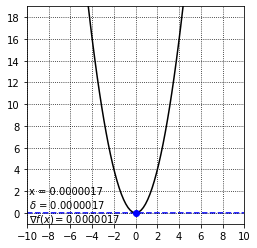

In [6]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, 3.5, alpha=0.5, xlim=xlim, ylim=ylim)
#print("Min X:", x_min)
#print("Converged:", converged)
HTML(anim.to_jshtml())


## Example 2

Notice that the value of `alpha` controls the length of the steps taken.  If it is too small, the algorithm requires more iterations to converge.  In this example we change the value of `alpha` from 0.5 to 0.15.

83 Frames
Min X: 4.8510849363264884e-06
Converged: True
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 done.

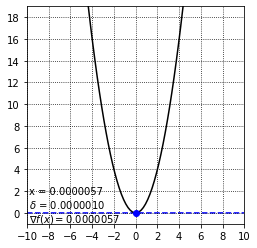

In [7]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, 3.5, alpha=0.15, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 3

On the other hand, if the value of `alpha` is too large, it can cause the algorithm to miss the minimum and possibly diverge.

In this example, we take $f(x)=5x^{2}$ and `alpha=0.45`.

Try setting the inital guess to 20 and `alpha` to 0.35 and see what happens.

In [8]:
xlim = (-50,50)
ylim = (-1000,10000)
fun = lambda xx: polynomial(xx, (0,0,5))
grad = lambda xx: polynomial_derivative(xx, (0,0,5))

/Users/rina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


49 Frames
Min X: inf
Converged: False
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 done.

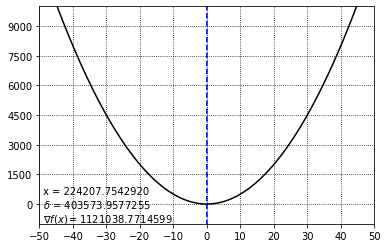

In [9]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, 5.0, alpha=0.45, aspect="auto", last_frame=50, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Converged:", converged)
HTML(anim.to_jshtml())

## Example 4

One of the problems with gradient descent is that it can get stuck in a local minimum and fail to find the global minimum.  To over come this, the algorithm is often run several times with random initial values.

In this example, we take $f(x)=x^4-5x^3+5x^2+5x-3$ and `x_init=5.0`.

In [10]:
xlim = (-5,7)
ylim = (-6,6)
fun = lambda xx: polynomial(xx, (-3,5,5,-5,1))
grad = lambda xx: polynomial_derivative(xx, (-3,5,5,-5,1))

62 Frames
Min X: 2.7207632627618477
Converged: True
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 done.

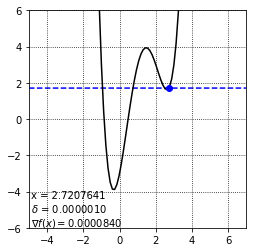

In [11]:
x_min, converged, anim = visualize_2d_gradient_descent(fun, grad, 5.0, xlim=xlim, ylim=ylim)
print("Min X:", x_min)
print("Converged:", converged)
HTML(anim.to_jshtml())

In [12]:
def gradient_descent(gradient, x_init, max_iters=10000, alpha=0.01, precision=1e-6):
    cur_x = x_init
    step_size = 1
    iters = 0
    
    while step_size > precision and iters < max_iters:
        prev_x = cur_x
        cur_x = cur_x - alpha * gradient(cur_x)
        step_size = np.abs(cur_x - prev_x)
        iters += 1
    
    return cur_x, step_size <= precision